# Projet FISA : Classification de fruits 

 Un grand nombre de fruits sont cultivés dans le monde entier, chacun d'entre eux présentant différents types. Les facteurs qui déterminent le type de fruit sont les caractéristiques de l'aspect extérieur telles que la couleur, la longueur, le diamètre et la forme. L'aspect extérieur des fruits est un facteur déterminant du type de fruit. Déterminer la variété de fruits en fonction de leur aspect extérieur peut nécessiter une expertise, ce qui prend du temps et demande beaucoup d'efforts.
 
**Objectif :**  classer les types de fruits de la datte, à savoir *Barhee, Deglet Nour, Sukkary, Rotab Mozafati, Ruthana, Safawi et Sagai*, en utilisant plusieurs méthodes de classification.
 
 À cette fin, **898 images** de sept types différents de fruits de la datte ont été obtenues via le système de vision par ordinateur (CVS). Grâce à des techniques de traitement d'images, un total de **34 caractéristiques**, dont les caractéristiques morphologiques, la forme et la couleur, ont été extraites de ces images. 



In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import scipy
import sklearn
import math
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns


/tmp/ipykernel_67220/3290672146.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Chargement des données 

In [6]:
# Chargement des données
DataSet = pd.read_excel('./Date_Fruit_Datasets.xlsx')
Classes = DataSet.pop("Class")

Data=np.array(DataSet)
DataSet.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,0.6019,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,0.4134,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,0.9183,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,1.8028,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,0.8865,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666


In [7]:
# Encodage du label en fonction des espèces de dattes
label= LabelEncoder()
integer_labels = label.fit_transform(Classes)

###  Découpage de l'ensemble de données en Apprentissage et test pour les approches supevisée. 

In [8]:
# Séparation de l'ensemble de données en Base d'apprentissage et base de test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Data, integer_labels, random_state=0,test_size=0.2)

print('Dimension Base d apprentissage :', X_train.shape)
print('Dimension Base de test :', X_test.shape)

Dimension Base d apprentissage : (718, 34)
Dimension Base de test : (180, 34)


### Fonctions pour réaliser une table de correspondance entre le label des approches non supervisées et le label réel

In [9]:
def retrieve_info(cluster_labels,y_train):
 #Associe l'étiquette la plus probable à chaque groupe dans le modèle KMeans.
 #Résultats : dictionnaire des clusters associés à chaque étiquette.

# Initialisation
  reference_labels = np.zeros((len(np.unique(cluster_labels)),1))
# Loop pour chaque label 
  for i in range(len(np.unique(cluster_labels))):
    index = np.where(cluster_labels == i,1,0)
    num = np.bincount(y_train[index==1]).argmax()
    reference_labels[i] = num
  return reference_labels

def correspondance(y_pred,label):
  # Correspondance entre la partition du clusterin y_pred et les classes de la vérité terrain label
  reference_labels = retrieve_info(y_pred,label)
  number_labels = np.zeros(len(y_pred))
  for i in range(len(y_pred)):
    number_labels[i] = reference_labels[y_pred[i]]
  return number_labels


# Partie I : Classification des phonèmes sans prétraitement 

Réaliser une classification de ces fruits par une méthode d'apprentissage supervisé et une méthode d'apprentissage non supervisé de votre choix en utilisant soit les codes des TP précédents, soit en utilisant la librairie *scikit-learn*.

Pour chaque résultat obtenu, calculer la matrice de confusion et interpréter les résultats.

## Méthode supervisée  : 
indiquer quelle est la méthode superviée de votre choix et calculer la matrice de confusion associée. 

In [10]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import ConfusionMatrixDisplay 

# Calcul de la matrice de confusion

#confusion_matrix(y_true, y_pred)

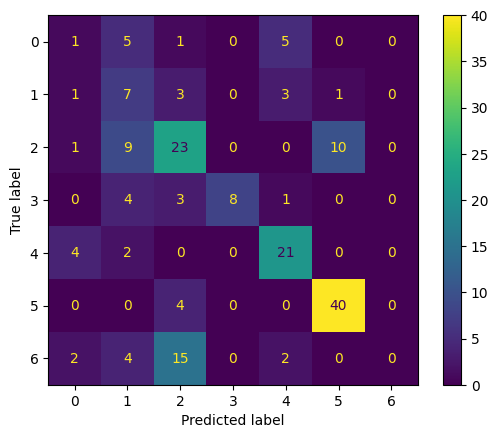

In [11]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

model = gnb.fit(X_train,y_train)

y_pred = model.predict(X_test)



disp = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred))

disp.plot()

plt.show()


(180,)


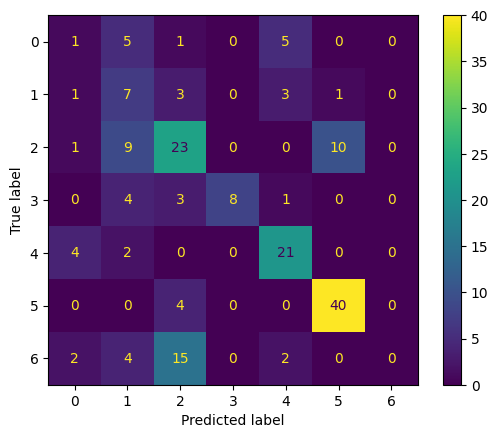

In [12]:
from sklearn import tree



def treeClassifierMaxAccr(x_train,y_train,x_test,y_test):
    print(y_test.shape)
    best_depth = -1
    max_accr = -1

    for i in range(2,34):
        clf = tree.DecisionTreeClassifier(max_depth=i)
        clf.fit(x_train,y_train)
        y_pred = clf.predict(x_test)
        
        curr_accr = accuracy_score(y_test,y_pred, normalize=False)
        

        if curr_accr > max_accr :
            max_accr = curr_accr
            best_depth = i

    return best_depth , max_accr

best_depth = treeClassifierMaxAccr(X_train,y_train,X_test,y_test)[0]

clf = tree.DecisionTreeClassifier(max_depth=best_depth)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

# disp = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred))

disp.plot()

plt.show()


## Méthode non supervisée

indiquer quelle est la méthode non supervisée de votre choix et calculer la matrice de confusion associée. 

# Partie II : classification des phonèmes avec prétraitement 


## Méthode supervisée avec réduction de dimension par ACP sur l'ensemble d'apprentissage
Réaliser une ACP sur l'ensemble d'apprentissage pour réduire la dimension, visualiser les données
puis projeter les données de l'ensemble de test dans la base de l'ACP.

Indiquer quelle est la méthode supervisée de votre choix et calculer la matrice de confusion associée (confusion_matrix) et le score de performance (accuracy_score)




matrice de variance-covariance [[1.00953044e+19 1.60701703e+19 3.06882865e+19 ... 9.94270880e+18
  5.33361852e+19 1.43281974e+19]
 [1.60701703e+19 2.72811029e+19 5.15225867e+19 ... 1.54742631e+19
  9.07392350e+19 2.34222961e+19]
 [3.06882865e+19 5.15225867e+19 9.85795070e+19 ... 2.95268243e+19
  1.71568032e+20 4.41128691e+19]
 ...
 [9.94270880e+18 1.54742631e+19 2.95268243e+19 ... 9.88438737e+18
  5.12838752e+19 1.40374063e+19]
 [5.33361852e+19 9.07392350e+19 1.71568032e+20 ... 5.12838752e+19
  3.01889605e+20 7.77103228e+19]
 [1.43281974e+19 2.34222961e+19 4.41128691e+19 ... 1.40374063e+19
  7.77103228e+19 2.07098884e+19]]


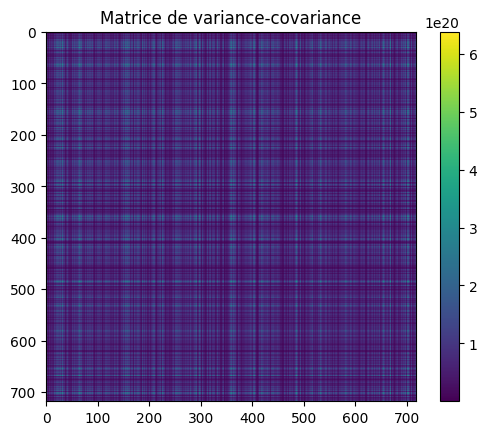

In [13]:
#ACP

S = np.cov(X_train)

print('matrice de variance-covariance', S)
fig4, ax4 = plt.subplots()
ax4.set_aspect('equal')
ax4.set_title('Matrice de variance-covariance')
plt.imshow(S)
plt.colorbar()
plt.show()

matrice de correlation [[1.         0.96834432 0.97279115 ... 0.99533696 0.96613577 0.99092998]
 [0.96834432 1.         0.99351259 ... 0.94233242 0.99986202 0.98539335]
 [0.97279115 0.99351259 1.         ... 0.94590722 0.99453248 0.97629959]
 ...
 [0.99533696 0.94233242 0.94590722 ... 1.         0.93881901 0.98112222]
 [0.96613577 0.99986202 0.99453248 ... 0.93881901 1.         0.98280137]
 [0.99092998 0.98539335 0.97629959 ... 0.98112222 0.98280137 1.        ]]


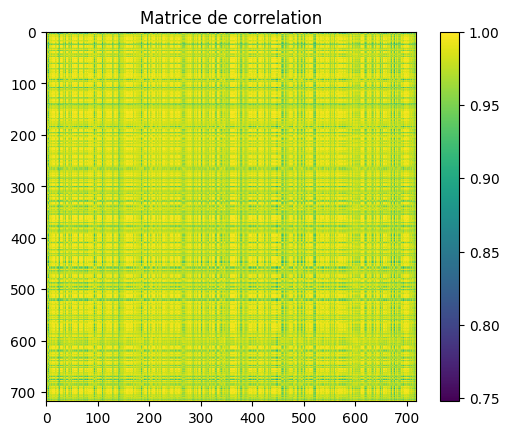

In [14]:
C=np.corrcoef(X_train)

# affichage de la matrice comme une image
print('matrice de correlation', C)
fig5, ax5 = plt.subplots()
ax5.set_aspect('equal')
ax5.set_title('Matrice de correlation')
plt.imshow(C)
plt.colorbar()
plt.show()

(34, 34)
(34, 2)
(718, 2)


/tmp/ipykernel_67220/2072732439.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  principalAxes[:,i]=eig_vecs[:,i]


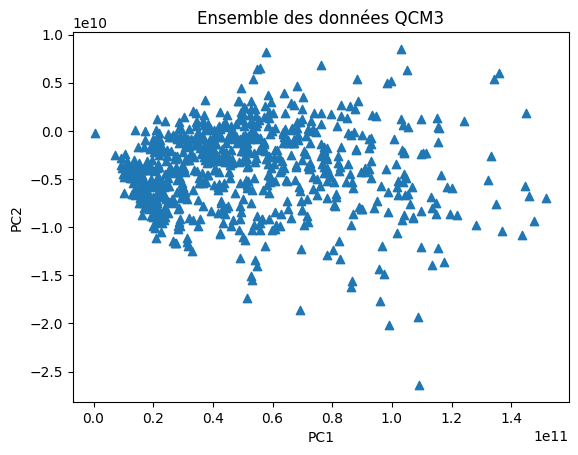

In [15]:
n_components=2 # nombre de dimensions réduites
cov_mat=np.cov(np.transpose(X_train)) # calcul de la matrice de var-cov

# Dimension de la matrice de variance-covariance
print(cov_mat.shape)

# Extraction des valeurs propres et vecteurs propres
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

# Définition des axes principaux
principalAxes=np.zeros((X_train.shape[1],n_components))
for i in range(n_components):
    principalAxes[:,i]=eig_vecs[:,i]

# Dimension des axes principaux
print(principalAxes.shape)


# Calcul des composantes principales c'est-à-dire les coefficients de projection des données 
# dans le nouveau repère défini par les axes principaux
principalComponents = X_train.dot(principalAxes)

# Dimension des composantes principales
print(principalComponents.shape)

gnb = GaussianNB()

gnb.fit()

# aAffichage des points
plt.scatter(principalComponents[:, 0], principalComponents[:, 1],marker='^')
plt.title("Ensemble des données QCM3")
plt.xlabel("PC1")
plt.ylabel("PC2");
plt.show()

## Méthode non supervisée avec réduction de dimension par ACP sur l'ensemble des données 

Réaliser une ACP sur l'ensemble des données et indiquer quelle est la méthode supervisée de votre choix et calculer la matrice de confusion associée (confusion_matrix) et le score de performance (accuracy_score)